In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

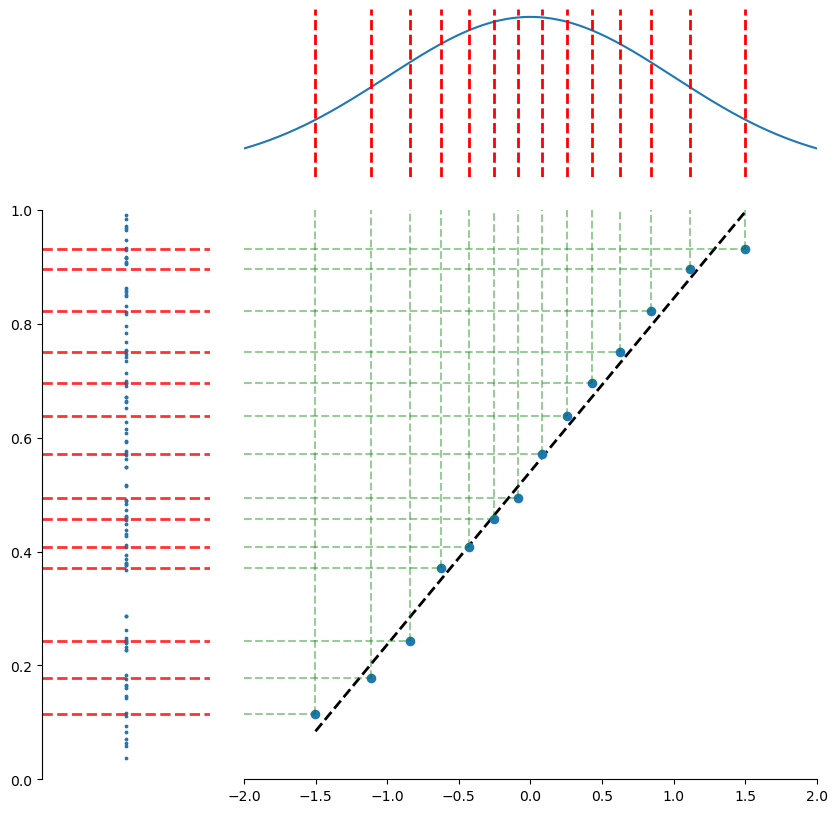

In [43]:
# Generate data for normal curve
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1)

# Calculate quantiles
quantiles = np.linspace(0, 1, 16)[1:-1]  # We remove 0 and 1 to get 14 in-between quantiles, making total 15 quantiles
x_quantiles = norm.ppf(quantiles)

# Generate 15 data points randomly between 0 and 1
data = np.random.uniform(0, 1, 100)

# Calculate 14 quantiles for the data

quantile_data= np.quantile(data, quantiles)

slope = np.std(quantile_data) / np.std(x_quantiles)
intercept = np.mean(quantile_data) - slope * np.mean(x_quantiles)

#PLot

mosaic= """

ABBB
CDDD
CDDD
CDDD

"""

fig, ax = plt.subplot_mosaic(mosaic=mosaic, figsize=(10,10))

ax['A'].set_axis_off()

# Normal curve
ax['B'].plot(x, y)
ax['B'].set_xlim(-2, 2)
for q in x_quantiles:
    ax['B'].axvline(q, color='red', linestyle='--', linewidth=2)
    
ax['B'].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax['B'].xaxis.set_visible(False)
ax['B'].yaxis.set_visible(False)

# Data
ax['C'].scatter(np.ones_like(data), data, s=3)
ax['C'].set_ylim(0, 1)
for q in quantile_data:
    ax['C'].axhline(q, color='red', linestyle='--', alpha=0.8, linewidth=2)
    
ax['C'].spines[['top', 'right', 'bottom']].set_visible(False)
ax['C'].xaxis.set_visible(False)
    
## QQplot

ax['D'].plot(x_quantiles, slope * x_quantiles + intercept, '--', lw=2, color='black', zorder=0)

ax['D'].scatter(x_quantiles, quantile_data, s=35)
ax['D'].set_xlim(-2, 2)
ax['D'].set_ylim(0, 1)

for xq,yq in zip(x_quantiles, quantile_data):
    ax['D'].axvline(xq,ymin=yq, color='green', linestyle='--', alpha=0.4, linewidth=1.5)
    
for qd,aq in zip(quantile_data, x_quantiles):
    ax['D'].plot([-2, aq], [qd, qd], color='green', linestyle='--', alpha=0.4, linewidth=1.5)
    
#set spine unvisible

ax['D'].spines[['left', 'top', 'right']].set_visible(False)
ax['D'].yaxis.set_visible(False)